In [2]:
# Check if NVIDIA GPU is enabled
!nvidia-smi

Sat Nov  2 19:45:37 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrivea
!ls /mydrive

Mounted at /content/gdrive
ls: cannot access '/mydrive': No such file or directory


In [4]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15867, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 15867 (delta 12), reused 20 (delta 10), pack-reused 15833 (from 1)
Receiving objects: 100% (15867/15867), 14.44 MiB | 13.84 MiB/s, done.
Resolving deltas: 100% (10678/10678), done.


In [3]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!make

/content/darknet
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:945:23: warning: variable ‘rgb’ set but not used []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-but-set-variable-Wunused-but-set-variable]8;;]
  945 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1443:14: warning: unused variable ‘buff’ []8;;https://gcc.gnu.org/on

In [11]:
#!cp cfg/yolov3.cfg cfg/yolov3_training.cfg
!cp /content/gdrive/MyDrive/yolov3/Data/yolov3_testing.cfg cfg/yolov3-tiny_training.cfg

In [13]:
!cp /content/gdrive/MyDrive/yolov3/Data/obj.names data/obj.names
!cp /content/gdrive/MyDrive/yolov3/Data/obj.data data/obj.data
!mkdir data/obj

mkdir: cannot create directory ‘data/obj’: File exists


In [14]:
# Download weights darknet model 53
!wget https://pjreddie.com/media/files/yolov3-tiny.weights

--2024-11-02 17:42:08--  https://pjreddie.com/media/files/yolov3-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35434956 (34M) [application/octet-stream]
Saving to: ‘yolov3-tiny.weights’

yolov3-tiny.weights 100%[===================>]  33.79M  42.7MB/s    in 0.8s    

2024-11-02 17:42:09 (42.7 MB/s) - ‘yolov3-tiny.weights’ saved [35434956/35434956]



In [17]:
!unzip /content/gdrive/MyDrive/yolov3/images.zip -d data/obj

Archive:  /content/gdrive/MyDrive/yolov3/images.zip
replace data/obj/README.dataset.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: data/obj/README.dataset.txt  
  inflating: data/obj/README.roboflow.txt  
 extracting: data/obj/test/_darknet.labels  
 extracting: data/obj/test/img-105_jpg.rf.acb7c967b9eeb2dda6c1f1356825ba2d.jpg  
  inflating: data/obj/test/img-105_jpg.rf.acb7c967b9eeb2dda6c1f1356825ba2d.txt  
 extracting: data/obj/test/img-107_jpg.rf.3c0d69d1df4b052b54a61654e7a24d87.jpg  
  inflating: data/obj/test/img-107_jpg.rf.3c0d69d1df4b052b54a61654e7a24d87.txt  
 extracting: data/obj/test/img-146_jpg.rf.65b918e96ebeeebe793d28d8942ab8b5.jpg  
  inflating: data/obj/test/img-146_jpg.rf.65b918e96ebeeebe793d28d8942ab8b5.txt  
 extracting: data/obj/test/img-161_jpg.rf.65d395f23f818bf1123b6221abaf4d6f.jpg  
  inflating: data/obj/test/img-161_jpg.rf.65d395f23f818bf1123b6221abaf4d6f.txt  
 extracting: data/obj/test/img-168_jpg.rf.f03a4c15831371d09b829b00662c1509.jpg  
  inflatin

In [18]:
!mv /content/darknet/data/obj/train/* /content/darknet/data/obj

In [20]:
import glob
images_list = glob.glob("data/obj/*.jpg")
#images_list = glob.glob("data/obj/*.png")
print(images_list)

['data/obj/img-57_jpg.rf.9275a649f6ca3488c03051e6aec08f31.jpg', 'data/obj/img-583_jpg.rf.539faec82e69a0222f93f07028077a23.jpg', 'data/obj/img-358_jpg.rf.a9fc30b998824b0d63de41423da13995.jpg', 'data/obj/img-78_jpg.rf.41fed7272d70e80d63fb126849c33009.jpg', 'data/obj/img-138_jpg.rf.e808efdabc555f8fc3b147868d9be84d.jpg', 'data/obj/img-283_jpg.rf.376d4379507bb8d8e5c95a67c02adb60.jpg', 'data/obj/img-589_jpg.rf.e30ca63215d89f235b16b84738f85777.jpg', 'data/obj/img-341_jpg.rf.9b6fcc7c4d249dc5b460ae2d9958a393.jpg', 'data/obj/img-10_jpg.rf.90d0a4b92608f45107741c1b12b90052.jpg', 'data/obj/img-345_jpg.rf.4ba234b71dd19bd655176a7cf0e5bfba.jpg', 'data/obj/img-18_jpg.rf.954db9e809c4a9bf58730ac9791bc642.jpg', 'data/obj/img-131_jpg.rf.c7f5523a1542b7dea50667dd33a87b86.jpg', 'data/obj/img-26_jpg.rf.30a915c1c2a89ce48830a08306937dfb.jpg', 'data/obj/img-401_jpg.rf.48b1725cc2d3c0daccbd7a69f030765e.jpg', 'data/obj/img-144_jpg.rf.0ba21a0c6068292432988ad4ab9a0a45.jpg', 'data/obj/img-565_jpg.rf.dd6e8b8e68e813b4316

In [21]:
#Create training.txt file
file = open("data/train.txt", "w")
file.write("\n".join(images_list))
file.close()

In [22]:
!./darknet partial cfg/yolov3-tiny.cfg yolov3-tiny.weights yolov3-tiny.conv.15 15

 CUDA-version: 12020 (12020), cuDNN: 8.9.6, GPU count: 1  
 OpenCV version: 4.5.4
 GPU isn't used 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 Create CUDA-stream - 0 
max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256       3 x 3/ 1     26 x  26 x 128 ->   26 x  26 x 256 0.399 BF
   9 max 

In [24]:
# Start the training
#!./darknet detector train data/obj.data cfg/yolov3-tiny_training.cfg darknet53.conv.74 -dont_show
!./darknet detector train  data/obj.data cfg/yolov3-tiny_training.cfg yolov3-tiny.conv.15 -dont_show


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 16 Avg (IOU: 0.666321), count: 12, class_loss = 1.340116, iou_loss = 0.854431, total_loss = 2.194548 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 23 Avg (IOU: 0.706867), count: 9, class_loss = 1.314892, iou_loss = 0.559790, total_loss = 1.874681 
 total_bbox = 328165, rewritten_bbox = 0.066735 % 
2103/2200: loss=1.2 hours left=0.0
 2103: 1.244369, 1.251996 avg loss, 0.000010 rate, 1.529713 seconds, 134592 images, 0.047944 hours left
Loaded: 0.000143 seconds
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 16 Avg (IOU: 0.721182), count: 9, class_loss = 1.613522, iou_loss = 0.752395, total_loss = 2.365917 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 23 Avg (IOU: 0.649797), count: 1, class_loss = 0.267752, iou_loss = 0.069829, total_loss = 0.337581 
 total_bbox = 328175, rewritten_bbox = 0.066733 % 
v3 (mse loss, Normalizer

In [4]:
!./darknet detector test data/obj.data cfg/yolov3-tiny_training.cfg /content/gdrive/MyDrive/yolov3/yolov3-tiny_training_final.weights

 CUDA-version: 12020 (12020), cuDNN: 8.9.6, GPU count: 1  
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256    

In [6]:
!./darknet detector test data/obj.data cfg/yolov3-tiny_training.cfg /content/gdrive/MyDrive/yolov3/yolov3-tiny_training_final.weights /content/gdrive/MyDrive/yolov3/test_image.jpg -out /content/gdrive/MyDrive/yolov3/output.json


 CUDA-version: 12020 (12020), cuDNN: 8.9.6, GPU count: 1  
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256    

In [9]:
import cv2
import os
from google.colab.patches import cv2_imshow  # Colab에서 이미지를 표시하기 위한 임포트

# 이미지 파일 경로가 저장된 리스트
image_files = [
    '/content/darknet/data/obj/valid/img-104_jpg.rf.2d5f7f96d40994c4bf60243d5a1bae56.jpg',
    '/content/darknet/data/obj/valid/img-106_jpg.rf.11cc321c797101e581ac0e60c0efae90.jpg'
]

output_dir = '/content/gdrive/MyDrive/yolov3/outputs/'
os.makedirs(output_dir, exist_ok=True)

for image_file in image_files:
    # 바운딩 박스 결과 이미지 저장
    output_image_file = os.path.join(output_dir, os.path.basename(image_file))

    # Darknet 테스트 명령어 실행
    !./darknet detector test data/obj.data cfg/yolov3-tiny_training.cfg /content/gdrive/MyDrive/yolov3/yolov3-tiny_training_final.weights {image_file} -out {output_image_file} -dont_show

    # 결과 이미지가 생성되었는지 확인
    if os.path.exists(output_image_file):
        # 결과 이미지 출력 (OpenCV로 로드 후 시각화)
        image = cv2.imread(output_image_file)

        if image is not None:
            cv2_imshow(image)  # cv2.imshow 대신 사용
        else:
            print(f"Error: Unable to read image from {output_image_file}")
    else:
        print(f"Error: Output image file {output_image_file} does not exist.")


 CUDA-version: 12020 (12020), cuDNN: 8.9.6, GPU count: 1  
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256    

In [11]:
# 테스트할 이미지 파일 경로
test_image_file = '/content/darknet/data/obj/valid/img-104_jpg.rf.2d5f7f96d40994c4bf60243d5a1bae56.jpg'
# 결과 이미지를 저장할 경로
output_image_file = '/content/gdrive/MyDrive/yolov3/outputs/test_output.jpg'

# Darknet 테스트 명령어 실행
!./darknet detector test data/obj.data cfg/yolov3-tiny_training.cfg /content/gdrive/MyDrive/yolov3/yolov3-tiny_training_final.weights {test_image_file} -out {output_image_file} -dont_show

# 결과 이미지 출력 (OpenCV로 로드 후 시각화)
import cv2
from google.colab.patches import cv2_imshow  # Colab에서 이미지를 표시하기 위한 임포트
import os

# 결과 이미지가 생성되었는지 확인
if os.path.exists(output_image_file):
    image = cv2.imread(output_image_file)
    if image is not None:
        cv2_imshow(image)  # cv2.imshow 대신 사용
    else:
        print("Error: The output image is None. Check if the output path is correct.")
else:
    print(f"Error: Output image file {output_image_file} does not exist.")


 CUDA-version: 12020 (12020), cuDNN: 8.9.6, GPU count: 1  
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256    

In [12]:
!python ./flow --model /content/darknet/cfg/yolov3-tiny_training.cfg --load /content/gdrive/MyDrive/yolov3/yolov3-tiny_training_final.weights --savepb

python3: can't open file '/content/darknet/./flow': [Errno 2] No such file or directory


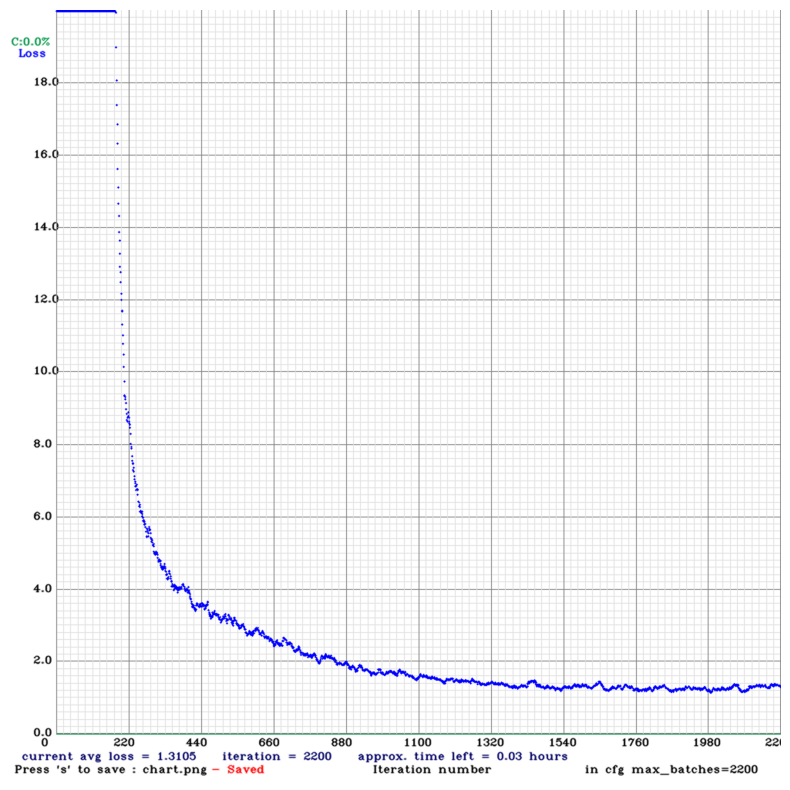

In [13]:
def imShow(path):
    import cv2
    import matplotlib.pyplot as plt
    %matplotlib inline
    image = cv2.imread(path)
    height, width = image.shape[:2]
    resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)
    fig = plt.gcf()
    fig.set_size_inches(18, 10)

    plt.axis("off")
    plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    plt.show()
imShow('chart.png')

In [16]:
%cd cfg
!sed -i 's/batch=64/batch=1/' /content/darknet/cfg/yolov3-tiny_training.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' /content/darknet/cfg/yolov3-tiny_training.cfg
%cd ..

/content/darknet/cfg
/content/darknet


 CUDA-version: 12020 (12020), cuDNN: 8.9.6, GPU count: 1  
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256    

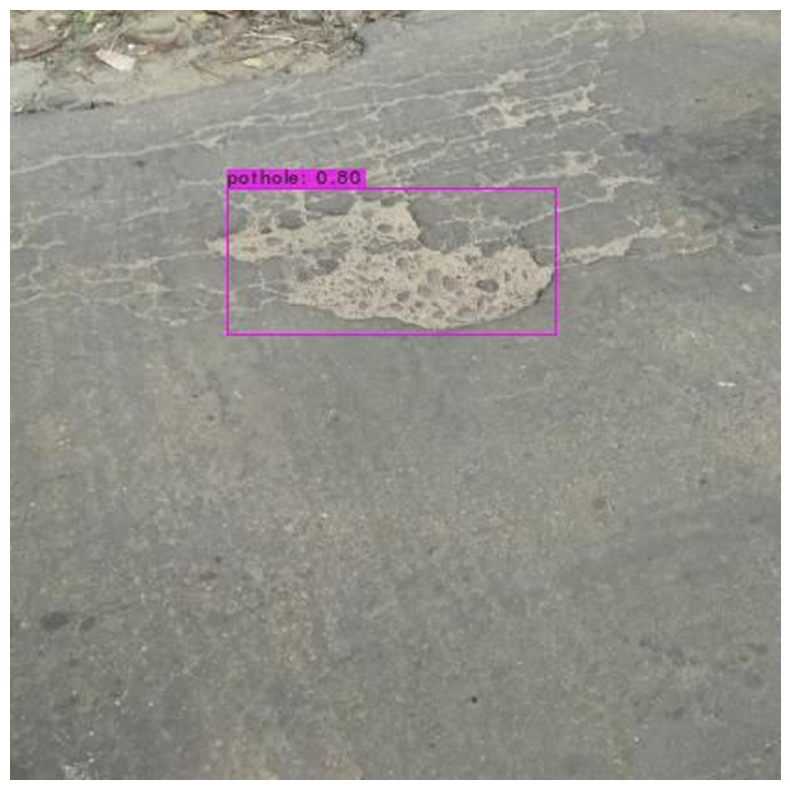

In [20]:
!./darknet detector test data/obj.data cfg/yolov3-tiny_training.cfg /content/gdrive/MyDrive/yolov3/yolov3-tiny_training_final.weights /content/darknet/data/obj/valid/img-112_jpg.rf.ebd4c5d1132f0bcb99a0128e50d77e56.jpg -thresh 0.3
imShow('predictions.jpg')